In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-of-zurich/20160307hundehalter.csv
/kaggle/input/dogs-of-zurich/20151001hundehalter.csv
/kaggle/input/dogs-of-zurich/zuordnungstabellehunderassehundetyp.csv
/kaggle/input/dogs-of-zurich/20170308hundehalter.csv


# Unveiling Zurich's Canine Community

**Audience:** The audience for this presentation is assumed to be a general audience with an interest in dogs and data. The tone will be informative and engaging.

**Narrative:** The narrative will revolve around understanding the dog population in Zurich, exploring trends in dog ownership, and highlighting interesting insights about the city's canine companions.

In [2]:
import pandas as pd

# Load the dog_owners dataset
dog_owners = pd.read_csv("../input/dogs-of-zurich/20170308hundehalter.csv")

# Load the dog_breeds dataset
dog_breeds = pd.read_csv("../input/dogs-of-zurich/zuordnungstabellehunderassehundetyp.csv")

# Display the first few rows of the dog_owners dataset
dog_owners.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [3]:
# Load the dog_owners dataset
dog_owners = pd.read_csv("../input/dogs-of-zurich/20170308hundehalter.csv")

# Load the dog_breeds dataset
dog_breeds = pd.read_csv("../input/dogs-of-zurich/zuordnungstabellehunderassehundetyp.csv")

# Display the column names in both datasets
print("Column names in dog_owners dataset:", dog_owners.columns)
print("Column names in dog_breeds dataset:", dog_breeds.columns)

Column names in dog_owners dataset: Index(['HALTER_ID', 'ALTER', 'GESCHLECHT', 'STADTKREIS', 'STADTQUARTIER',
       'RASSE1', 'RASSE1_MISCHLING', 'RASSE2', 'RASSE2_MISCHLING', 'RASSENTYP',
       'GEBURTSJAHR_HUND', 'GESCHLECHT_HUND', 'HUNDEFARBE'],
      dtype='object')
Column names in dog_breeds dataset: Index(['HUNDERASSE', 'HUNDERASSENTYP_KURZ', 'HUNDERASSENTYP'], dtype='object')


In [4]:
# Rename columns in dog_breeds dataset
dog_breeds = dog_breeds.rename(columns={
    "HUNDERASSE": "breed",
    "HUNDERASSENTYP_KURZ": "breed_type_short",
    "HUNDERASSENTYP": "breed_type_long"
})

# Rename columns in dog_owners dataset
dog_owners = dog_owners.rename(columns={
    "HALTER_ID": "owner_id",
    "ALTER": "age",
    "GESCHLECHT": "owner_gender",
    "STADTKREIS": "district",
    "RASSE1": "breed",
    "RASSE2": "secondary_breed",
    "GEBURTSJAHR_HUND": "birth_year",
    "GESCHLECHT_HUND": "dog_gender",
    "HUNDEFARBE": "color"
})

# Merge dog_owners and dog_breeds datasets on 'breed' column
owners_dogs_merged = pd.merge(dog_owners, dog_breeds, on="breed")

# Drop unnecessary columns
owners_dogs_merged = owners_dogs_merged.drop(columns=[
    "secondary_breed",
    "RASSENTYP",
    "STADTQUARTIER",
    "RASSE1_MISCHLING",
    "RASSE2_MISCHLING"
])

# Select and reorder columns
owners_dogs_merged = owners_dogs_merged[[
    "owner_id",
    "age",
    "owner_gender",
    "district",
    "breed",
    "birth_year",
    "dog_gender",
    "color",
    "breed_type_short",
    "breed_type_long"
]]

# Drop rows with missing values
owners_dogs_merged = owners_dogs_merged.dropna()

# Display the first few rows of the merged and cleaned dataset
owners_dogs_merged.head()

,owner_id,age,owner_gender,district,breed,birth_year,dog_gender,color,breed_type_short,breed_type_long
0,126,61-70,m,9.0,Welsh Terrier,2011,w,schwarz/braun,K,Kleinwüchsig
1,88455,41-50,w,7.0,Welsh Terrier,2016,w,rot/schwarz,K,Kleinwüchsig
2,101835,41-50,w,8.0,Welsh Terrier,2010,m,braun/schwarz,K,Kleinwüchsig
3,108769,61-70,m,3.0,Welsh Terrier,2010,w,black/tan,K,Kleinwüchsig
4,125471,61-70,w,6.0,Welsh Terrier,2008,m,black/tan,K,Kleinwüchsig


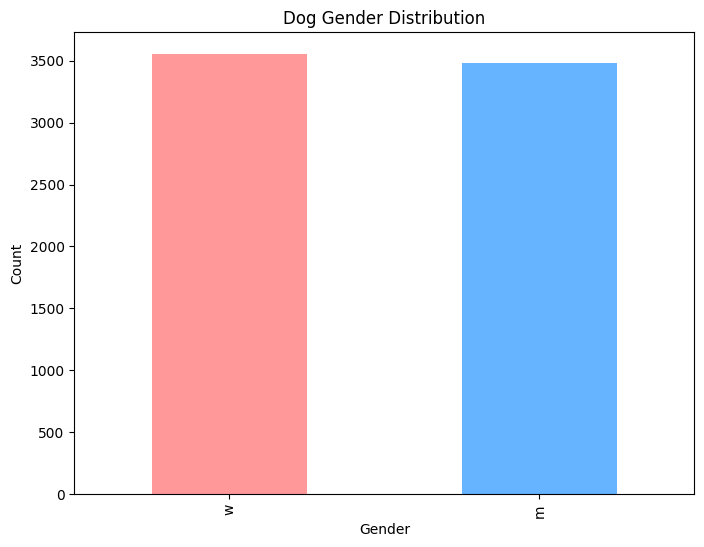

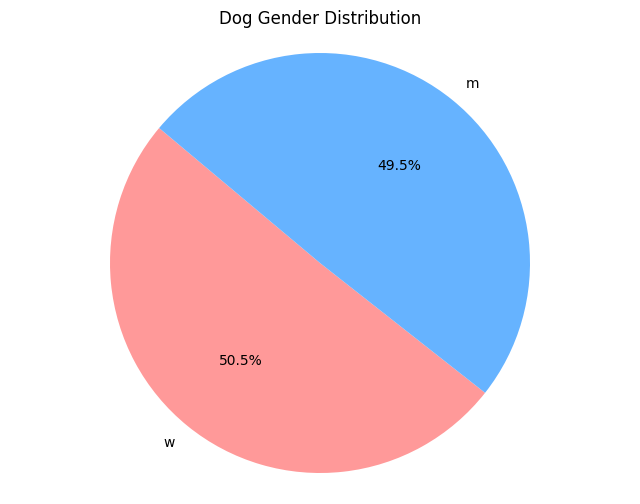

In [5]:
import matplotlib.pyplot as plt

# Count the number of each dog gender
gender_counts = owners_dogs_merged['dog_gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Aesthetic colors
gender_counts.plot(kind='bar', color=colors)
plt.title('Dog Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Create a pie chart
plt.figure(figsize=(8, 6))
labels = gender_counts.index
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Dog Gender Distribution')

plt.show()

**Bar Plot Observations:**

* There are two bars, one pink and one blue, likely representing female and male dogs, respectively.
* The pink bar, labeled 'w', appears slightly smaller than the blue bar, labeled 'm'.
* Although exact counts are not clear, the height of the bars suggests that the count for 'm' is slightly higher than for 'w'.

**Pie Chart Observations:**

* The pie chart has two nearly equal portions, with blue labeled 'm' and pink labeled 'w'.
* The percentages are given as 49.5% for 'm' and 50.5% for 'w', indicating a very close distribution between male and female dogs.

**Significant Gender Insights:**

* The distribution of dog genders is almost even, with a slight predominance of females (50.5%) over males (49.5%) as shown in the pie chart.
* This near parity suggests there isn't a strong gender preference or disparity in the population of dogs represented by this data.
* The bar plot suggests a higher count for males, but without the exact figures, it's difficult to quantify the difference. The discrepancy between the pie chart and bar plot could be due to rounding or scale differences in the charts.

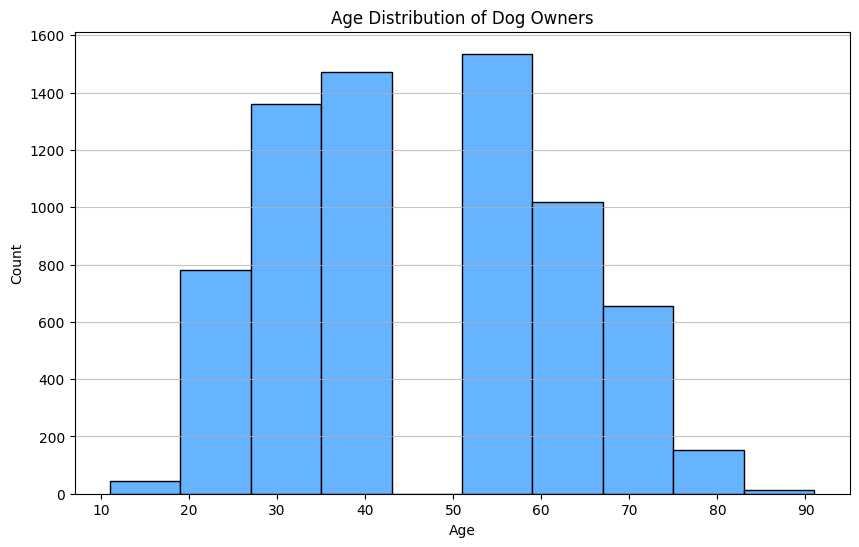

In [6]:
# Convert the 'age' column to a numeric format (e.g., using the lower end of the age range)
owners_dogs_merged['age'] = owners_dogs_merged['age'].str.split('-').str[0].astype(int)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(owners_dogs_merged['age'], bins=10, color='#66b3ff', edgecolor='black')
plt.title('Age Distribution of Dog Owners')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Observations:**

* The histogram shows that the largest group of dog owners falls in the age brackets of 40-49 and 50-59 years.
* The count then gradually decreases for the 60-69 and 70-79 age brackets.
* The youngest (10-19) and oldest (80-89) age groups have the fewest dog owners.
* The distribution is right-skewed, indicating a higher concentration of dog owners in the middle-aged brackets.

**Patterns:**

* There is a notable increase in dog ownership that begins to rise significantly in the 30-39 age bracket and peaks in the 40-49 and 50-59 brackets. This pattern could be associated with increased stability in living conditions, which might make dog ownership more feasible.
* After the peak, there is a steady decline in ownership as age increases, which may reflect changes in lifestyle, health, or mobility that could affect the ability to care for a pet.

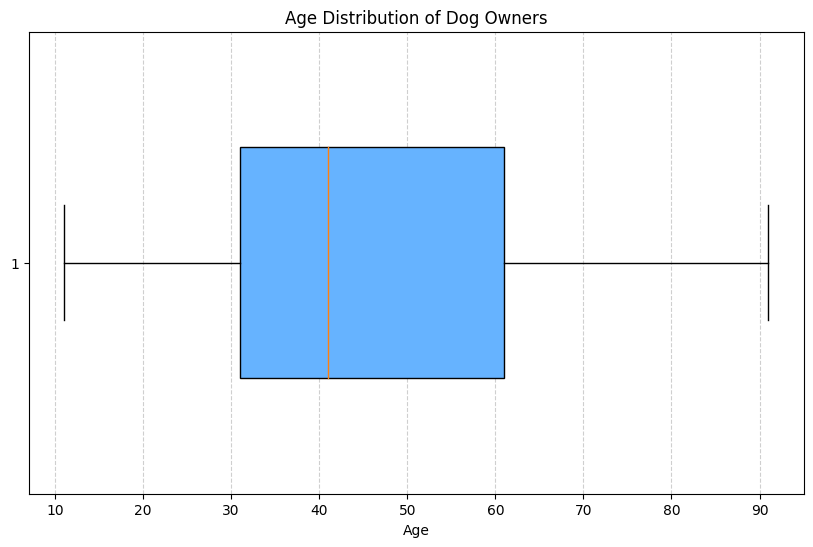

In [7]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(owners_dogs_merged['age'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#66b3ff'))
plt.title('Age Distribution of Dog Owners')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Boxplot Interpretation:**

* The line in the middle of the box indicates the median age of dog owners. This is the age that divides the dataset into two equal halves, with 50% of the data falling below this value and 50% above.
* The box itself represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). This contains the middle 50% of the data.
* The "whiskers" extend from the box to the highest and lowest values within 1.5 IQR from the Q3 and Q1, respectively. Points beyond this are considered outliers, but it seems there are no outliers in this dataset, or they are not indicated in the image.
* The left whisker represents the spread of the lower 25% of the data, and the right whisker represents the upper 25% of the data.

**Notable Observations:**

* The distribution appears to be fairly symmetrical around the median, given that the box is quite central and the whiskers appear roughly equal in length.
* The absence of outliers suggests that the ages of dog owners are relatively evenly distributed without extreme values.
* The median line appears to be slightly to the left of the center of the box, suggesting a slight skew towards younger owners, but this is not very pronounced.

In [8]:
# Count the frequencies of each primary breed
breed_counts = owners_dogs_merged['breed'].value_counts()

# Display the top primary breeds and their frequencies
top_breeds = breed_counts.head(10)  # You can adjust the number as needed
print("Top Primary Breeds and Their Frequencies:")
print(top_breeds)

Top Primary Breeds and Their Frequencies:
breed
Mischling klein           620
Chihuahua                 516
Labrador Retriever        439
Yorkshire Terrier         298
Jack Russel Terrier       290
Französische Bulldogge    213
Mischling gross           206
Malteser                  205
Mops                      171
Schäfer                   168
Name: count, dtype: int64


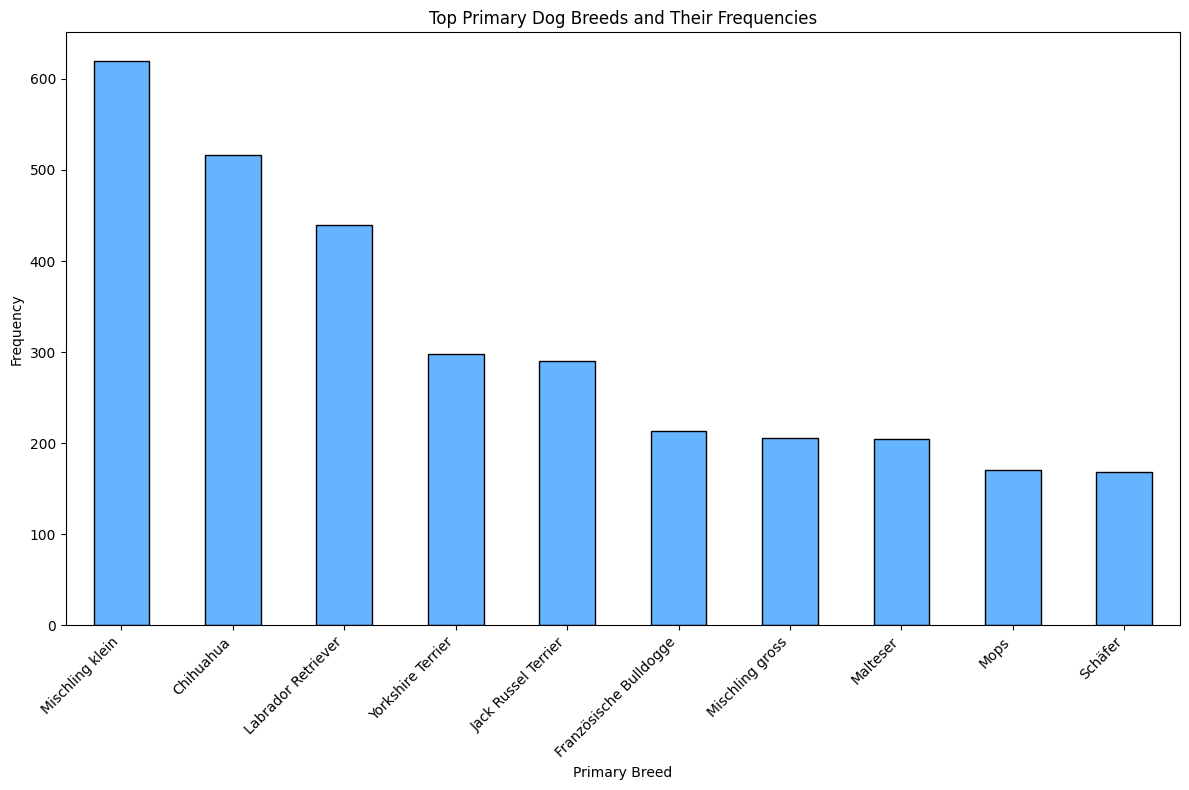

In [9]:
# Create a bar plot for the top primary breeds and their frequencies
plt.figure(figsize=(12, 8))
top_breeds.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title('Top Primary Dog Breeds and Their Frequencies')
plt.xlabel('Primary Breed')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**Observations:**

* The breed with the highest frequency is "Mischling Klein," which seems to refer to small mixed-breed dogs.
* The following breeds in descending order of frequency are: Chihuahua, Labrador Retriever, Yorkshire Terrier, Jack Russell Terrier, Französische Bulldogge (French Bulldog), Mischling Gross (large mixed breed), Malteser (Maltese), and Husky.
* The Siberian Husky and Maltese are at the lower end of the frequency scale among the breeds listed.

**Unique or Unexpected Breeds:**

* "Mischling Klein" and "Mischling Gross" are not specific breeds but categories for mixed-breed dogs of small and large sizes, respectively. It is somewhat unique for mixed breeds to be at the top of a frequency chart, as this indicates a high number of non-purebred dogs in the dataset.
* The Chihuahua's high ranking might be considered somewhat unexpected given its small size, which may or may not be a typical preference in every region.
* The presence of breeds such as the Siberian Husky could be considered unexpected given Zurich's urban environment, where one might assume smaller breeds would be more popular due to space constraints.

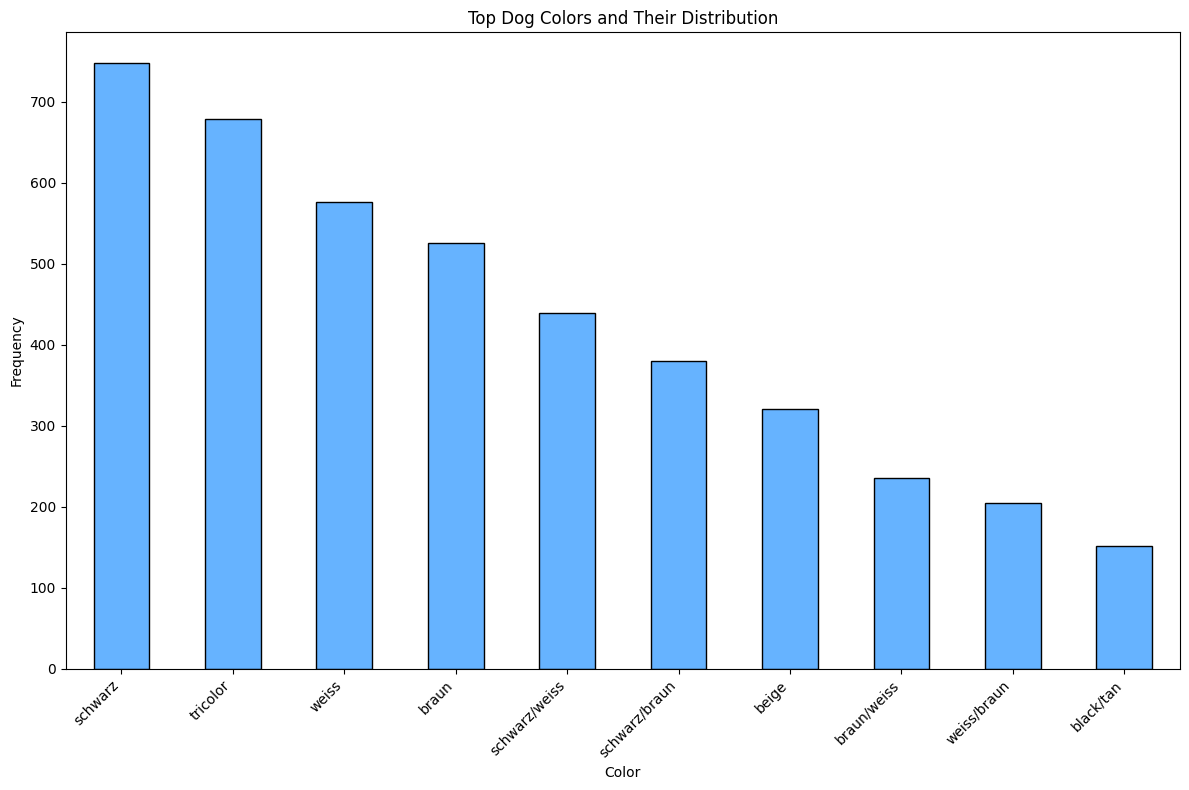

In [10]:
# Count the frequencies of each dog color
color_counts = owners_dogs_merged['color'].value_counts()

# Display the top dog colors and their frequencies
top_colors = color_counts.head(10)  # You can adjust the number as needed

# Create a bar plot for the top dog colors and their frequencies
plt.figure(figsize=(12, 8))
top_colors.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title('Top Dog Colors and Their Distribution')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**Observations:**

* The most common color is "Schwarz" (Black), which has the highest bar on the chart.
* The rarest color among those listed is "Weiss/Schwarz" (White/Black), which has the lowest bar on the chart.
* The colors, in descending order of frequency, are as follows: Schwarz (Black), Braun (Brown), Weiss (White), Braun/Weiss (Brown/White), Schwarz/Braun (Black/Brown), Beige, Braun/Weiss (Brown/White again, possibly a labeling error or a different pattern), Weiss/Braun (White/Brown), and Weiss/Schwarz (White/Black).

**Insights:**

* Black appears to be the most common dog color among the dogs represented in this data set.
* Bi-colored dogs, especially those with combinations of white and black or brown, seem to be less common.
* The color distribution shows a variety of colors, but solid colors like black, brown, and white are more frequent than mixed or bi-colors.

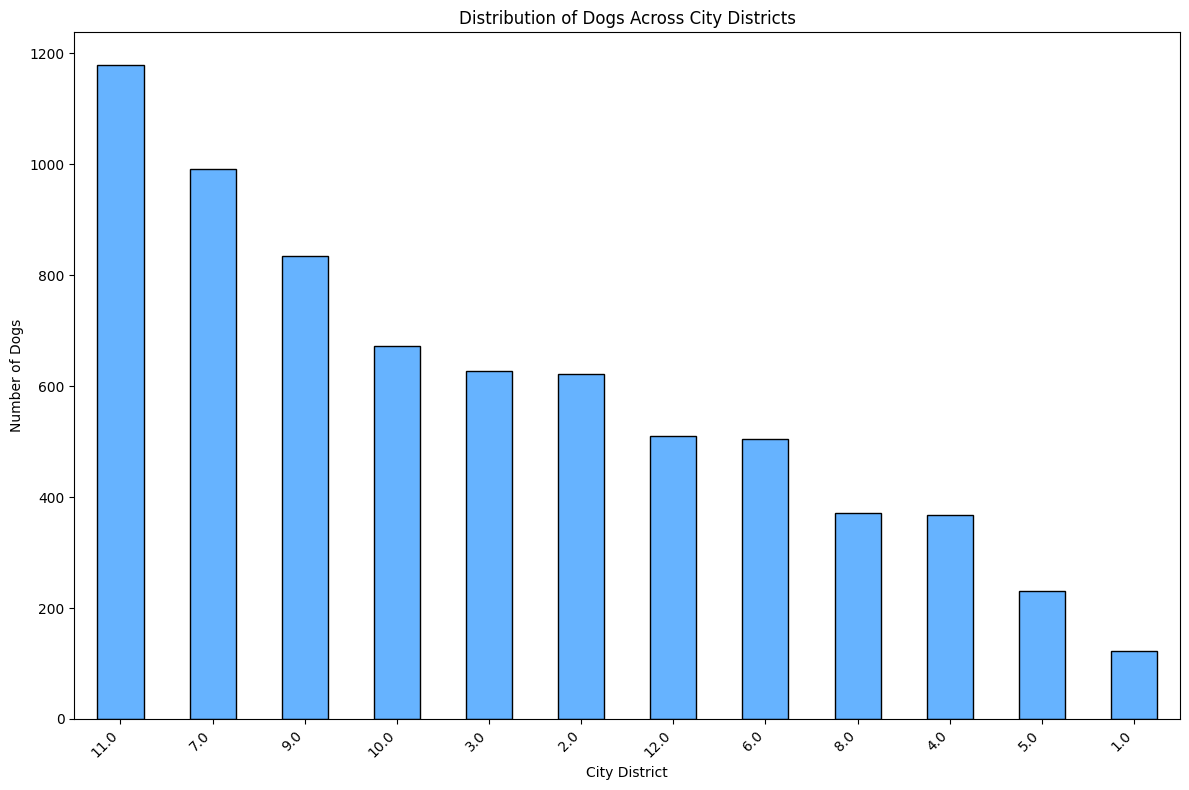

In [11]:
# Count the frequencies of dogs in each city district
district_counts = owners_dogs_merged['district'].value_counts()

# Create a bar plot for the distribution of dogs across city districts
plt.figure(figsize=(12, 8))
district_counts.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title('Distribution of Dogs Across City Districts')
plt.xlabel('City District')
plt.ylabel('Number of Dogs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**Observations:**

* District "12.0" has the highest number of dogs, significantly more than any other district, as indicated by the tallest bar.
* The district with the fewest dogs is "1.0", which has the shortest bar.
* The distribution of dogs across districts appears to decline as the district number increases, with some fluctuations. For example, districts "3.0" and "11.0" have a higher number of dogs compared to their immediate neighboring districts.

**Spatial Patterns:**

* There's a noticeable trend where some districts (like "12.0" and "7.0") have higher dog populations. This could be due to various factors such as the size of the district, the presence of dog-friendly facilities, or socio-economic factors that might affect dog ownership rates.
* Lower numbers in districts like "1.0" might be associated with a more urbanized environment with potentially less space for larger pets or stricter pet control policies.
* The fluctuating pattern suggests that there might not be a simple gradient (e.g., decreasing dog population with increasing district number), but rather a complex interaction of factors that influence dog ownership.

**Further Insights:**

* To understand the reasons behind these spatial patterns, one might consider factors such as the average household size, presence of green spaces, and local regulations regarding pet ownership in each district.
* A comparison with human population distribution could also be insightful, as a higher human population density might not directly translate to higher dog numbers due to space constraints and lifestyle differences.

# Continue analysis of Zurich's canine community

Integrate additional datasets about dog owners from different years. These datasets will provide a more comprehensive view over time.

The next steps involve loading these datasets, preprocessing them similar to what was done with the 2017 dataset, and then performing a combined analysis.

In [12]:

owners_2015 = pd.read_csv("../input/dogs-of-zurich/20151001hundehalter.csv")
owners_2016 = pd.read_csv("../input/dogs-of-zurich/20160307hundehalter.csv")

# Renaming columns to match the 2017 dataset
columns_rename = {
    "HALTER_ID": "owner_id",
    "ALTER": "age",
    "GESCHLECHT": "owner_gender",
    "STADTKREIS": "district",
    "RASSE1": "breed",
    "RASSE2": "secondary_breed",
    "GEBURTSJAHR_HUND": "birth_year",
    "GESCHLECHT_HUND": "dog_gender",
    "HUNDEFARBE": "color"
}

owners_2015.rename(columns=columns_rename, inplace=True)
owners_2016.rename(columns=columns_rename, inplace=True)

# Load dog breeds dataset
dog_breeds = pd.read_csv("../input/dogs-of-zurich/zuordnungstabellehunderassehundetyp.csv")

# Rename columns in dog_breeds dataset
dog_breeds.rename(columns={
    "HUNDERASSE": "breed",
    "HUNDERASSENTYP_KURZ": "breed_type_short",
    "HUNDERASSENTYP": "breed_type_long"
}, inplace=True)

# Merging datasets
merged_2015 = pd.merge(owners_2015, dog_breeds, on="breed")
merged_2016 = pd.merge(owners_2016, dog_breeds, on="breed")
merged_2017 = pd.merge(dog_owners, dog_breeds, on="breed") # Assuming dog_owners is your 2017 dataset

# Combine all years into a single DataFrame
all_years_merged = pd.concat([merged_2015, merged_2016, merged_2017])

# Drop unnecessary columns and rows with missing values
columns_to_drop = [
    "secondary_breed",
    "RASSENTYP",
    "STADTQUARTIER",
    "RASSE1_MISCHLING",
    "RASSE2_MISCHLING"
]

all_years_merged.drop(columns=columns_to_drop, inplace=True)
all_years_merged.dropna(inplace=True)

# Convert age column to numeric format
all_years_merged['age'] = all_years_merged['age'].str.split('-').str[0].astype(int)

# Display the first few rows of the combined dataset
all_years_merged.head()

,owner_id,age,owner_gender,district,breed,birth_year,dog_gender,color,breed_type_short,breed_type_long
0,126,51,m,9.0,Welsh Terrier,2011,w,schwarz/braun,K,Kleinwüchsig
1,84431,71,w,7.0,Welsh Terrier,2004,w,black/tan,K,Kleinwüchsig
2,88455,41,w,7.0,Welsh Terrier,1999,m,schwarz/rot,K,Kleinwüchsig
3,101835,41,w,8.0,Welsh Terrier,2010,m,braun/schwarz,K,Kleinwüchsig
4,108769,61,m,3.0,Welsh Terrier,2010,w,black/tan,K,Kleinwüchsig


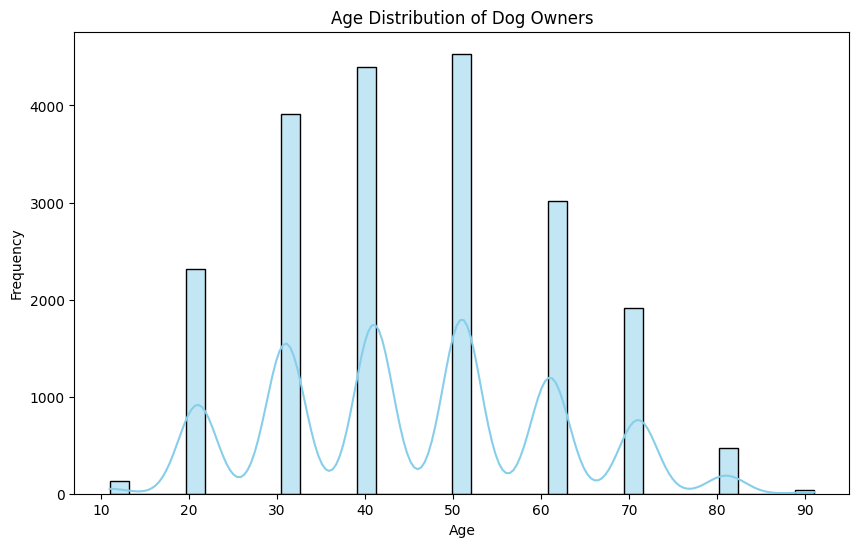

In [13]:
import seaborn as sns

# Age Distribution of Dog Owners
plt.figure(figsize=(10, 6))
sns.histplot(all_years_merged['age'], kde=True, color='skyblue')
plt.title('Age Distribution of Dog Owners')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Interpreting the Line Graph:**

The line graph, which follows the shape of the histogram, could represent a kernel density estimation (KDE) or a smoothed version of the histogram. This line helps to visualize the distribution's shape and where the data are more concentrated.

**Observations from the Graph:**

* The most significant number of dog owners are in the age ranges of 20-30, 30-40, and 50-60 years old. These peaks could indicate the most common ages for dog ownership.
* The frequency of dog owners decreases for ages below 20 and above 60, with a more pronounced decline after age 70.
* There are notably fewer dog owners in the under-10 and over-90 age categories, as can be expected.

**Conclusions:**

* Dog ownership appears to be most popular among individuals in their late twenties to early forties, as well as those in their fifties.
* There's a lesser prevalence of dog ownership among the very young and the elderly.
* The histogram and KDE together provide a clear picture of where dog ownership is most and least common across different age groups.
* This type of graph is useful for businesses in the pet industry, veterinarians, or community planners who may use this data for market research, resource allocation, or community services planning.

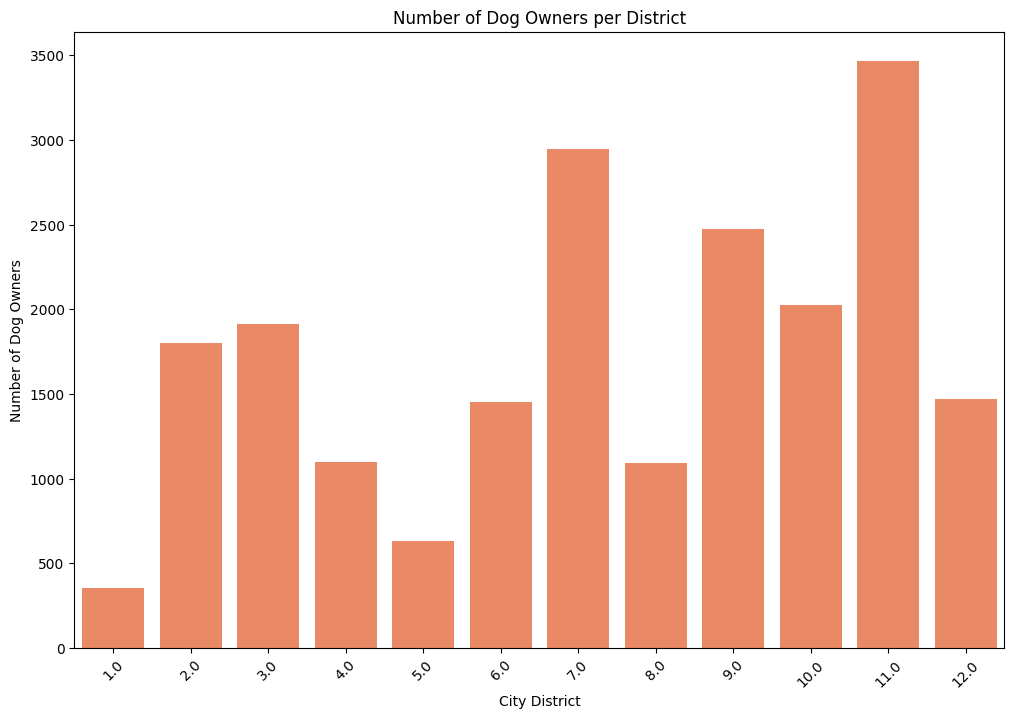

In [14]:
# Gender-Based Analysis
gender_breed = all_years_merged.groupby(['owner_gender', 'breed']).size().reset_index(name='count')
gender_breed = gender_breed.sort_values(['owner_gender', 'count'], ascending=[True, False])

# District-Based Analysis
district_analysis = all_years_merged.groupby('district').agg({'owner_id': 'count', 'breed': 'nunique'}).reset_index()
district_analysis.rename(columns={'owner_id': 'number_of_owners', 'breed': 'unique_breeds'}, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=district_analysis, x='district', y='number_of_owners', color='coral')
plt.title('Number of Dog Owners per District')
plt.xlabel('City District')
plt.ylabel('Number of Dog Owners')
plt.xticks(rotation=45)
plt.show()

**Observations from the Graph:**

* The distribution of dog owners is uneven across the city districts, with some districts having significantly more dog owners than others.
* District 9 has the highest number of dog owners, followed by District 12.
* District 6 has the fewest dog owners, indicating it might be less populated, less pet-friendly, or could have other factors influencing dog ownership.

**Conclusions:**

* This bar chart could be used by pet-related businesses for market analysis or by city planners for providing pet-related services or infrastructure.
* The data might suggest areas where there could be higher demand for dog parks, veterinary services, or pet stores.